In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
df = pd.read_csv('aac_intakes_outcomes.csv', parse_dates=True)

# Dataset Overview

In [4]:
df.shape

(79672, 41)

In [9]:
df.head()

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,...,age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days
0,10 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,3650,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,...,"(7.5, 10.0]",2017-12-07 00:00:00,12,2017,2017-12,Thursday,14,1.0,0 days 14:07:00.000000000,0.588194
1,7 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2555,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,...,"(5.0, 7.5]",2014-12-19 10:21:00,12,2014,2014-12,Friday,10,2.0,1 days 06:14:00.000000000,1.259722
2,6 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2190,6.0,"(5.0, 7.5]",2014-03-08 17:10:00,...,"(5.0, 7.5]",2014-03-07 14:26:00,3,2014,2014-03,Friday,14,3.0,1 days 02:44:00.000000000,1.113889
3,10 years,A047759,2004-04-02 00:00:00,Partner,Transfer,Neutered Male,3650,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,...,"(7.5, 10.0]",2014-04-02 15:55:00,4,2014,2014-04,Wednesday,15,1.0,4 days 23:17:00.000000000,4.970139
4,16 years,A134067,1997-10-16 00:00:00,NaN,Return to Owner,Neutered Male,5840,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,...,"(15.0, 17.5]",2013-11-16 09:02:00,11,2013,2013-11,Saturday,9,1.0,0 days 02:52:00.000000000,0.119444


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79672 entries, 0 to 79671
Data columns (total 41 columns):
age_upon_outcome              79672 non-null object
animal_id_outcome             79672 non-null object
date_of_birth                 79672 non-null object
outcome_subtype               36348 non-null object
outcome_type                  79662 non-null object
sex_upon_outcome              79671 non-null object
age_upon_outcome_(days)       79672 non-null int64
age_upon_outcome_(years)      79672 non-null float64
age_upon_outcome_age_group    79672 non-null object
outcome_datetime              79672 non-null datetime64[ns]
outcome_month                 79672 non-null int64
outcome_year                  79672 non-null int64
outcome_monthyear             79672 non-null object
outcome_weekday               79672 non-null object
outcome_hour                  79672 non-null int64
outcome_number                79672 non-null float64
dob_year                      79672 non-null int64
do

In [11]:
df.outcome_datetime = pd.to_datetime(df.outcome_datetime)

In [12]:
df.describe()

,age_upon_outcome_(days),age_upon_outcome_(years),outcome_month,outcome_year,outcome_hour,outcome_number,dob_year,dob_month,count,age_upon_intake_(days),age_upon_intake_(years),intake_month,intake_year,intake_hour,intake_number,time_in_shelter_days
count,79672.000000,79672.000000,79672.000000,79672.000000,79672.000000,79672.000000,79672.000000,79672.000000,79672.0,79672.000000,79672.000000,79672.000000,79672.000000,79672.000000,79672.000000,79672.000000
mean,782.046127,2.142592,6.655425,2015.472563,14.297306,1.126820,2013.254870,6.310310,1.0,769.341701,2.107785,6.584032,2015.436101,13.487022,1.126820,16.757116
std,1058.528519,2.900078,3.414284,1.305944,3.774317,0.456057,3.216517,3.289077,0.0,1056.009040,2.893175,3.366579,1.303157,3.121173,0.456057,41.679359
min,0.000000,0.000000,1.000000,2013.000000,0.000000,1.000000,1991.000000,1.000000,1.0,0.000000,0.000000,1.000000,2013.000000,0.000000,1.000000,0.000000
25%,90.000000,0.246575,4.000000,2014.000000,12.000000,1.000000,2012.000000,4.000000,1.0,60.000000,0.164384,4.000000,2014.000000,11.000000,1.000000,1.102083
50%,365.000000,1.000000,7.000000,2015.000000,15.000000,1.000000,2014.000000,6.000000,1.0,365.000000,1.000000,7.000000,2015.000000,13.000000,1.000000,4.987153
75%,1095.000000,3.000000,10.000000,2017.000000,17.000000,1.000000,2015.000000,9.000000,1.0,1095.000000,3.000000,10.000000,2017.000000,16.000000,1.000000,13.610764
max,9125.000000,25.000000,12.000000,2018.000000,23.000000,13.000000,2018.000000,12.000000,1.0,9125.000000,25.000000,12.000000,2018.000000,23.000000,13.000000,1606.194444


## What animals take longest to adopt?

In [13]:
df['animal_type'].unique()

array(['Dog', 'Cat', 'Other', 'Bird'], dtype=object)

In [14]:
df['animal_type'].describe()

count     79672
unique        4
top         Dog
freq      45366
Name: animal_type, dtype: object

Text(0, 0.5, 'Time in Shelter (Days)')

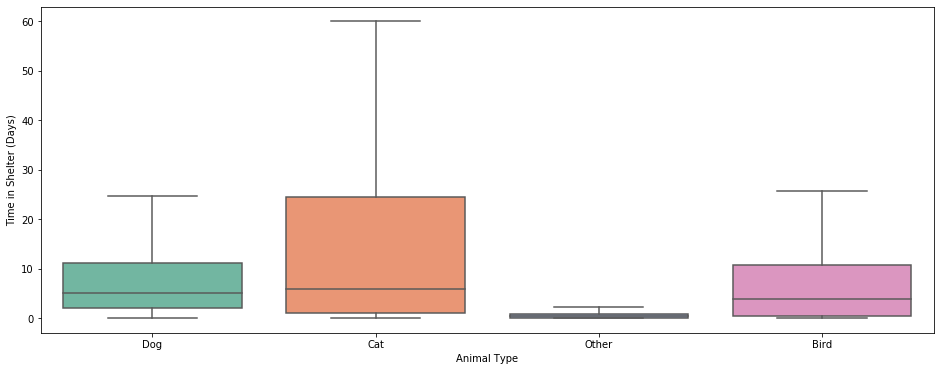

In [72]:
plt.figure(figsize=(16, 6))
sns.boxplot(x='animal_type', y='time_in_shelter_days', palette='Set2', data=df, showfliers=False)
plt.xlabel('Animal Type')
plt.ylabel('Time in Shelter (Days)')

Although dogs are more common in this dataset, they take less time on average to adoption than cats.

In [16]:
dogs = df[df['animal_type'] == 'Dog']
cats = df[df['animal_type'] == 'Cat']
birds = df[df['animal_type'] == 'Bird']
other = df[df['animal_type'] == 'Other']

# Dogs

## Does breed affect adoption time?

In [17]:
dogs['breed'].nunique()

1919

In [18]:
dogs['breed'].value_counts().head()

Pit Bull Mix                 6256
Chihuahua Shorthair Mix      4831
Labrador Retriever Mix       4789
German Shepherd Mix          1950
Australian Cattle Dog Mix    1099
Name: breed, dtype: int64

In [179]:
dogs['breed'] = dogs['breed'].str.replace('Black/Tan Hound', 'Black-Tan Hound')
dogs['breed'] = dogs['breed'].str.replace(' Shorthair', '')
dogs['breed'] = dogs['breed'].str.replace(' Longhair', '')
dogs['breed_nomix'] = dogs['breed'].str.replace(' Mix', '')
dogs['breed_list'] = dogs['breed_nomix'].str.split('/')
dogs.loc[dogs.breed_list.str.len()>1, 'mixed_breed'] = 'Mixed Breed'
dogs.loc[dogs['breed'].str.contains('Mix'), 'mixed_breed'] = 'Mixed Breed'
dogs['mixed_breed'] = dogs['mixed_breed'].fillna('Purebred')
#dogs.sort_index(axis=0)

In [204]:
has_breeds = pd.get_dummies(dogs['breed_list'].apply(pd.Series).stack()).sum(level=0)

In [205]:
dog_breeds_combined = pd.concat([dogs, has_breeds], axis=1)

In [22]:
breed_melt1 = dog_breeds_combined[['breed_list', 'mixed_breed', 'time_in_shelter_days']]
breed_melt2 = dog_breeds_combined.loc[:, 'Affenpinscher':]
breed_melt = pd.concat([breed_melt1, breed_melt2], axis=1)
dog_breeds = pd.melt(breed_melt, id_vars=['breed_list','mixed_breed','time_in_shelter_days'], 
                       var_name='breed_name', value_name='has_breed')
dog_breeds.loc[dog_breeds['has_breed']==1, 'breed'] = dog_breeds['breed_name']

In [23]:
common_breeds = dog_breeds.groupby('breed').sum()
common_breeds = common_breeds.sort_values('has_breed', ascending=False)
other_breeds = common_breeds.loc[common_breeds['has_breed']<400,:]
other_breeds_list = other_breeds.index.tolist()

In [24]:
dog_breeds.loc[dog_breeds['breed'].isin(other_breeds_list), 'breed_category'] = 'Other'
dog_breeds.loc[~dog_breeds['breed'].isin(other_breeds_list), 'breed_category'] = dog_breeds['breed']
dog_breeds.head()

,breed_list,mixed_breed,time_in_shelter_days,breed_name,has_breed,breed,breed_category
0,[Spinone Italiano],Mixed Breed,0.588194,Affenpinscher,0,NaN,NaN
1,[Spinone Italiano],Mixed Breed,1.259722,Affenpinscher,0,NaN,NaN
2,[Spinone Italiano],Mixed Breed,1.113889,Affenpinscher,0,NaN,NaN
3,[Dachshund],Purebred,4.970139,Affenpinscher,0,NaN,NaN
4,[Shetland Sheepdog],Purebred,0.119444,Affenpinscher,0,NaN,NaN


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

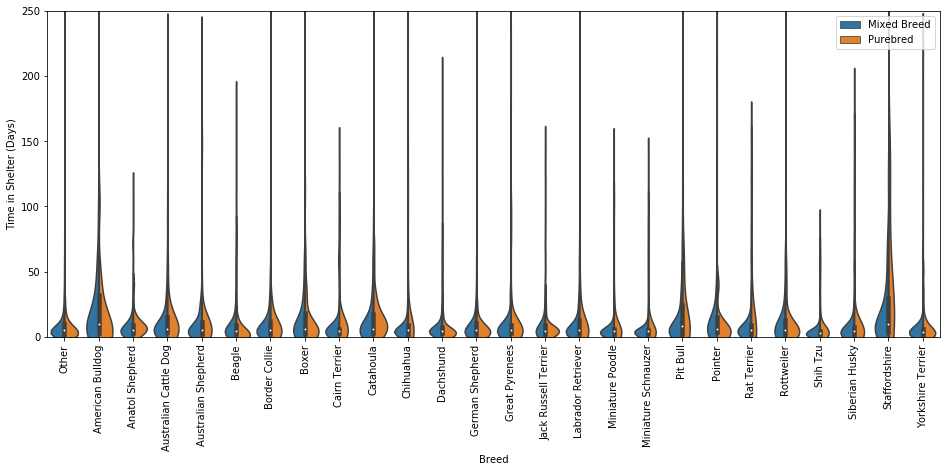

In [25]:
plt.figure(figsize=(16, 6))
sns.violinplot(x='breed_category', y='time_in_shelter_days', hue='mixed_breed', 
                    data=dog_breeds[dog_breeds['time_in_shelter_days']<=250], split=True)
plt.xlabel('Breed')
plt.ylabel('Time in Shelter (Days)')
plt.ylim(0,250)
plt.legend()
plt.xticks(rotation=90)

The outliers on this plot make it difficult to read and interpret.

In [26]:
sortgroup = dog_breeds['breed_category'].value_counts().to_dict()

I created a dictionary to order the next graph from L-R by number of occurrences for each breed.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

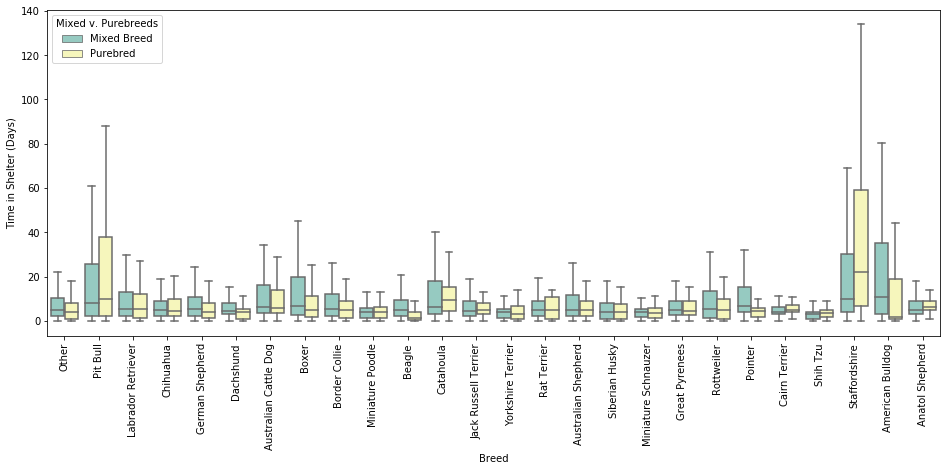

In [27]:
plt.figure(figsize=(16, 6))
sns.boxplot(x='breed_category', y='time_in_shelter_days', hue='mixed_breed', 
                    data=dog_breeds, palette='Set3', showfliers=False, order=sortgroup)
plt.xlabel('Breed')
plt.ylabel('Time in Shelter (Days)')
plt.legend(title='Mixed v. Purebreeds', loc='upper left')
plt.xticks(rotation=90)

## How does breed group affect adoption times?
### AKC groupings include the Hound Group, Terrier Group, Working Group, Herding Group, Sporting Group, Non-Sporting Group, Toy Group, and Miscellaneous

Categorize dog breeds by groups and/or country of origin.
See https://en.wikipedia.org/wiki/List_of_dog_breeds

In [28]:
dog_groups = pd.read_csv('dogbreed_categories.csv', header=0)
dog_groups = dog_groups[['Breed', 'Origin', 'American Kennel Club[4]', 'United Kennel Club[9]']]
dog_groups.head()

,Breed,Origin,American Kennel Club[4],United Kennel Club[9]
0,Affenpinscher,"Germany, France",Toy Group,Companion Dog
1,Afghan Hound,Afghanistan,Hound Group,Sighthound and Pariah
2,Afghan Shepherd,Afghanistan,NaN,NaN
3,Aidi,Morocco,NaN,Guardian Dog
4,Airedale Terrier,United Kingdom (England),Terrier Group,Terrier


maybe use merge?

In [171]:
breed_groups = pd.merge(left=dog_breeds, right=dog_groups, left_on='breed', right_on='Breed')
AKCgroups = ['Hound Group', 'Terrier Group', 'Working Group', 'Herding Group', 
             'Sporting Group', 'Non-Sporting Group', 'Toy Group', 'Miscellaneous']
breed_groups = breed_groups[breed_groups['American Kennel Club[4]'].isin(AKCgroups)]

In [172]:
sortbreedgroup = breed_groups['American Kennel Club[4]'].value_counts().to_dict()
sortbreedgroup

{'Toy Group': 9521,
 'Sporting Group': 7877,
 'Hound Group': 3864,
 'Herding Group': 3736,
 'Working Group': 3524,
 'Terrier Group': 2844,
 'Non-Sporting Group': 1112,
 'Miscellaneous': 69}

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

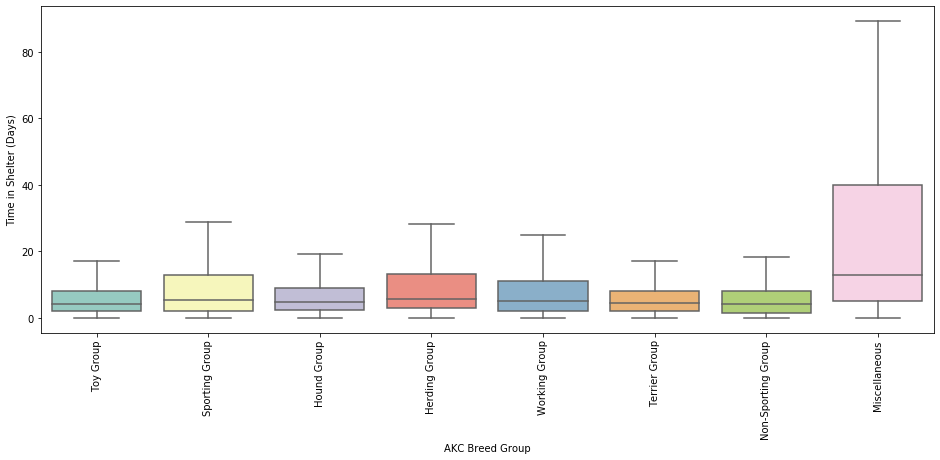

In [54]:
plt.figure(figsize=(16, 6))
sns.boxplot(x='American Kennel Club[4]', y='time_in_shelter_days', 
                    data=breed_groups, palette='Set3', showfliers=False, order=sortbreedgroup)
plt.xlabel('AKC Breed Group')
plt.ylabel('Time in Shelter (Days)')
#plt.legend(title='Mixed v. Purebreeds')
#plt.ylim(0,40)
plt.xticks(rotation=90)

## Overall purebred v. mixedbreed adoption times

(array([0, 1]), <a list of 2 Text xticklabel objects>)

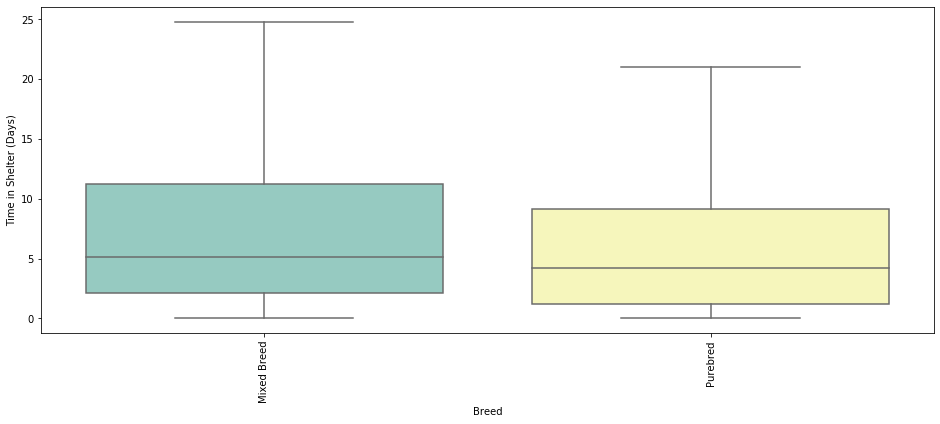

In [55]:
plt.figure(figsize=(16, 6))
sns.boxplot(x='mixed_breed', y='time_in_shelter_days', 
                    data=dog_breeds, palette='Set3', showfliers=False)
plt.xlabel('Breed')
plt.ylabel('Time in Shelter (Days)')
plt.xticks(rotation=90)

## Adoption times by age

(array([-2.5,  0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5]),
 <a list of 11 Text xticklabel objects>)

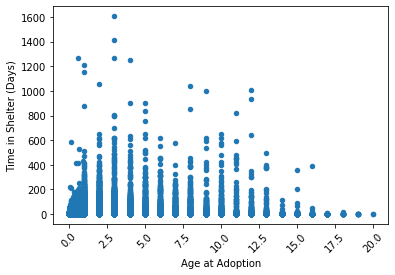

In [41]:
dogs.plot(x='age_upon_outcome_(years)', y='time_in_shelter_days', 
                    kind='scatter') #showfliers=True)
plt.xlabel('Age at Adoption')
plt.ylabel('Time in Shelter (Days)')
plt.xticks(rotation=45)

### Use age group as a categorical since it is not continuous in the data

In [210]:
dogs['age_group'] = dogs['age_upon_outcome_age_group'].str[1:-1]
dogs['age_group'] = dogs['age_group'].str.replace(', ','-')
sortagegroup = dogs['age_group'].value_counts().to_dict()
sortagegroup

{'-0.025-2.5': 29921,
 '2.5-5.0': 8533,
 '5.0-7.5': 2708,
 '7.5-10.0': 2702,
 '10.0-12.5': 780,
 '12.5-15.0': 590,
 '15.0-17.5': 106,
 '17.5-20.0': 26}

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

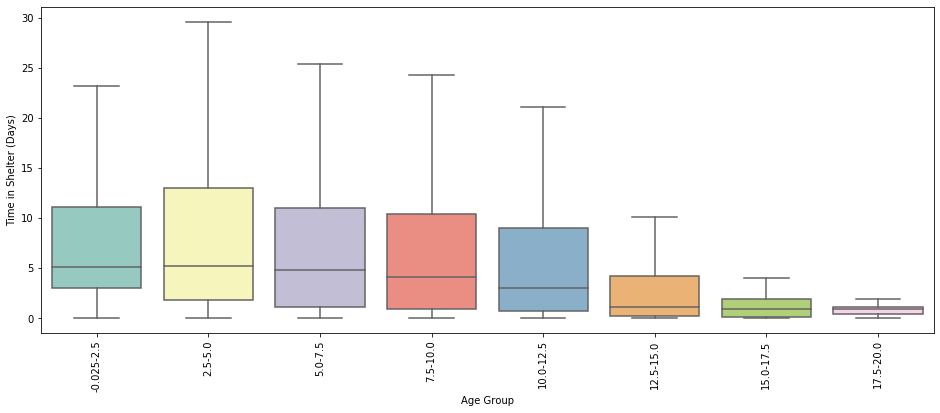

In [211]:
plt.figure(figsize=(16, 6))
sns.boxplot(x='age_group', y='time_in_shelter_days', 
                    data=dogs, palette='Set3', showfliers=False, order=sortagegroup)
plt.xlabel('Age Group')
plt.ylabel('Time in Shelter (Days)')
plt.xticks(rotation=90)

## Does coat color affect adoption time?

In [42]:
dogs['color'].value_counts().head()

Black/White    5201
Black          2507
Brown/White    2463
Tan/White      2450
White          2366
Name: color, dtype: int64

In [202]:
dogs['coat_color_list'] = dogs['color'].str.split('/')
dogs.loc[dogs.breed_list.str.len()>1, 'multicolor'] = 'Multicolor'
dogs.loc[dogs['color'].str.contains('Tricolor'), 'multicolor'] = 'Multicolor'
dogs['multicolor'] = dogs['multicolor'].fillna('Single Color')

In [203]:
coat_colors = pd.get_dummies(dogs['coat_color_list'].apply(pd.Series).stack()).sum(level=0)

In [45]:
coat_colors_combined = pd.concat([dogs, coat_colors], axis=1)
coat_colors_combined.head()

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,...,Red Tick,Ruddy,Sable,Silver,Tan,Tortie,Tricolor,White,Yellow,Yellow Brindle
0,10 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,3650,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,...,0,0,0,0,0,0,0,1,1,0
1,7 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2555,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,...,0,0,0,0,0,0,0,1,1,0
2,6 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2190,6.0,"(5.0, 7.5]",2014-03-08 17:10:00,...,0,0,0,0,0,0,0,1,1,0
3,10 years,A047759,2004-04-02 00:00:00,Partner,Transfer,Neutered Male,3650,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,...,0,0,0,0,0,0,1,0,0,0
4,16 years,A134067,1997-10-16 00:00:00,NaN,Return to Owner,Neutered Male,5840,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,...,0,0,0,0,0,0,0,1,0,0


In [46]:
coat1 = coat_colors_combined[['color', 'coat_color_list', 'multicolor', 'time_in_shelter_days']]
coat2 = coat_colors_combined.loc[:, 'Agouti':]
coat_melt = pd.concat([coat1, coat2], axis=1)
dog_coats = pd.melt(coat_melt, id_vars=['color', 'coat_color_list', 'multicolor','time_in_shelter_days'], 
                       var_name='coat_color', value_name='has_color')
dog_coats.loc[dog_coats['has_color']==1, 'colored'] = dog_coats['coat_color']

In [47]:
common_colors = dog_coats.groupby('colored').count()
common_colors = common_colors.sort_values('has_color', ascending=False)
other_colors = common_colors.loc[common_colors['has_color']<200,:]
other_colors_list = other_colors.index.tolist()
other_colors_list

['Gold',
 'Silver',
 'Blue Tick',
 'Red Tick',
 'Red Merle',
 'Yellow Brindle',
 'Apricot',
 'Liver',
 'Orange',
 'Blue Tiger',
 'Black Smoke',
 'Blue Cream',
 'Brown Tiger',
 'Liver Tick',
 'Pink',
 'Agouti',
 'Blue Smoke',
 'Black Tiger',
 'Brown Tabby',
 'Gray Tiger',
 'Ruddy',
 'Tortie']

In [48]:
dog_coats.loc[dog_coats['colored'].isin(other_colors_list), 'color_category'] = 'Other'
dog_coats.loc[~dog_coats['colored'].isin(other_colors_list), 'color_category'] = dog_coats['colored']
dog_coats.head()

,color,coat_color_list,multicolor,time_in_shelter_days,coat_color,has_color,colored,color_category
0,Yellow/White,"[Yellow, White]",Single Color,0.588194,Agouti,0,NaN,NaN
1,Yellow/White,"[Yellow, White]",Single Color,1.259722,Agouti,0,NaN,NaN
2,Yellow/White,"[Yellow, White]",Single Color,1.113889,Agouti,0,NaN,NaN
3,Tricolor,[Tricolor],Multicolor,4.970139,Agouti,0,NaN,NaN
4,Brown/White,"[Brown, White]",Single Color,0.119444,Agouti,0,NaN,NaN


In [49]:
sort_color = dog_coats['color_category'].value_counts().to_dict()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

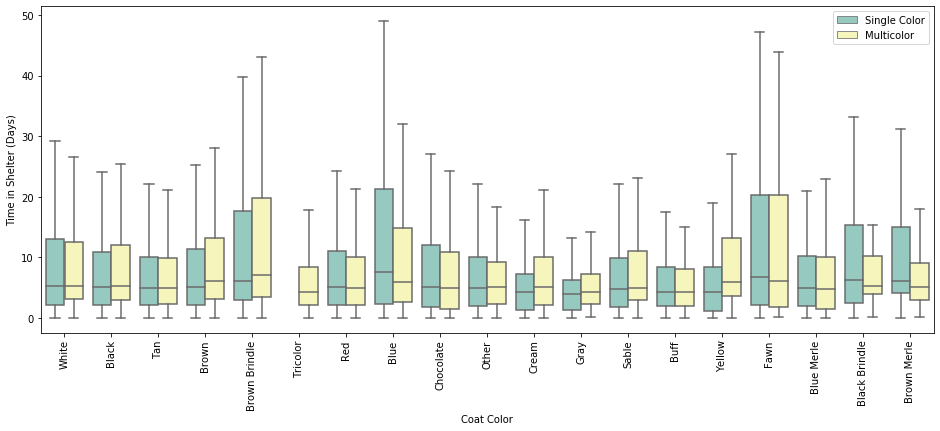

In [50]:
plt.figure(figsize=(16, 6))
sns.boxplot(x='color_category', y='time_in_shelter_days', hue='multicolor', 
                    data=dog_coats, palette='Set3', showfliers=False, order=sort_color)
plt.xlabel('Coat Color')
plt.ylabel('Time in Shelter (Days)')
plt.legend()
plt.xticks(rotation=90)

# What about animals who are 'outliers' for adoption time?
Repeat initial analyses but using only animals with long adoption times: >50 days.

## Adoption times by animal type for outliers

Text(0, 0.5, 'Time in Shelter (Days)')

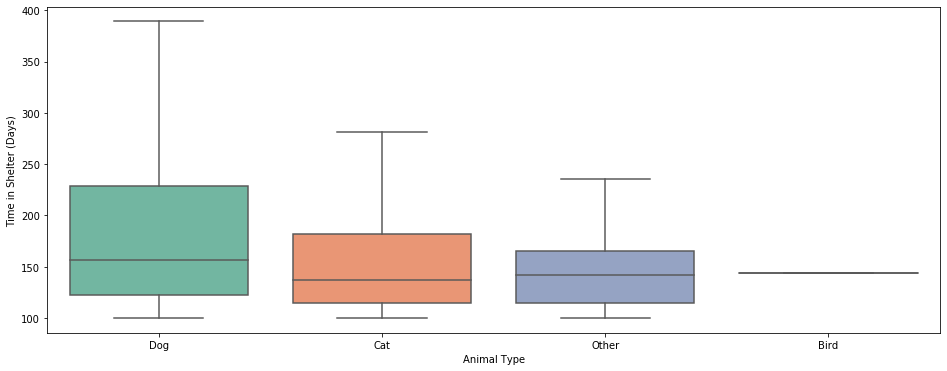

In [81]:
df_outliers = df.loc[df['time_in_shelter_days'] > 100,:]

plt.figure(figsize=(16, 6))
sns.boxplot(x='animal_type', y='time_in_shelter_days', palette='Set2', data=df_outliers, showfliers=False)
plt.xlabel('Animal Type')
plt.ylabel('Time in Shelter (Days)')

## Dogs with outlier adoption times

In [215]:
dog_outliers = df_outliers[df_outliers['animal_type'] == 'Dog']

dog_outliers['breed'] = dog_outliers['breed'].str.replace('Black/Tan Hound', 'Black-Tan Hound')
dog_outliers['breed'] = dog_outliers['breed'].str.replace(' Shorthair', '')
dog_outliers['breed'] = dog_outliers['breed'].str.replace(' Longhair', '')
dog_outliers['breed_nomix'] = dog_outliers['breed'].str.replace(' Mix', '')
dog_outliers['breed_list'] = dog_outliers['breed_nomix'].str.split('/')
dog_outliers.loc[dog_outliers.breed_list.str.len()>1, 'mixed_breed'] = 'Mixed Breed'
dog_outliers.loc[dog_outliers['breed'].str.contains('Mix'), 'mixed_breed'] = 'Mixed Breed'
dog_outliers['mixed_breed'] = dog_outliers['mixed_breed'].fillna('Purebred')

has_breeds_outliers = pd.get_dummies(dog_outliers['breed_list'].apply(pd.Series).stack()).sum(level=0)

breeds_combined_outliers = pd.concat([dog_outliers, has_breeds_outliers], axis=1)

In [140]:
outlier_melt1 = breeds_combined_outliers[['breed_list', 'mixed_breed', 'time_in_shelter_days']]
outlier_melt2 = breeds_combined_outliers.loc[:, 'Akita':]
outlier_melt = pd.concat([outlier_melt1, outlier_melt2], axis=1)
breed_outliers = pd.melt(outlier_melt, id_vars=['breed_list','mixed_breed','time_in_shelter_days'], var_name='breed_name', value_name='has_breed')
breed_outliers.loc[breed_outliers['has_breed']==1, 'breed'] = breed_outliers['breed_name']

In [156]:
breed_outliers.groupby('breed').sum().sort_values('has_breed',ascending=False)['has_breed'].quantile(.75)

7.75

In [157]:
common_breeds_outliers = breed_outliers.groupby('breed').sum()
common_breeds_outliers = common_breeds_outliers.sort_values('has_breed', ascending=False)
other_breeds_outliers = common_breeds_outliers.loc[common_breeds_outliers['has_breed']<8,:]
other_breeds_list_outliers = other_breeds_outliers.index.tolist()

breed_outliers.loc[breed_outliers['breed'].isin(other_breeds_list_outliers), 'breed_category'] = 'Other'
breed_outliers.loc[~breed_outliers['breed'].isin(other_breeds_list_outliers), 'breed_category'] = breed_outliers['breed']

Determining the number of breeds to group as 'other' is much more difficult, as many of the values of adopiton times >100 have only 1 animal in a breed category. I used quartiles this time to try and see only the most common breeds in this 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

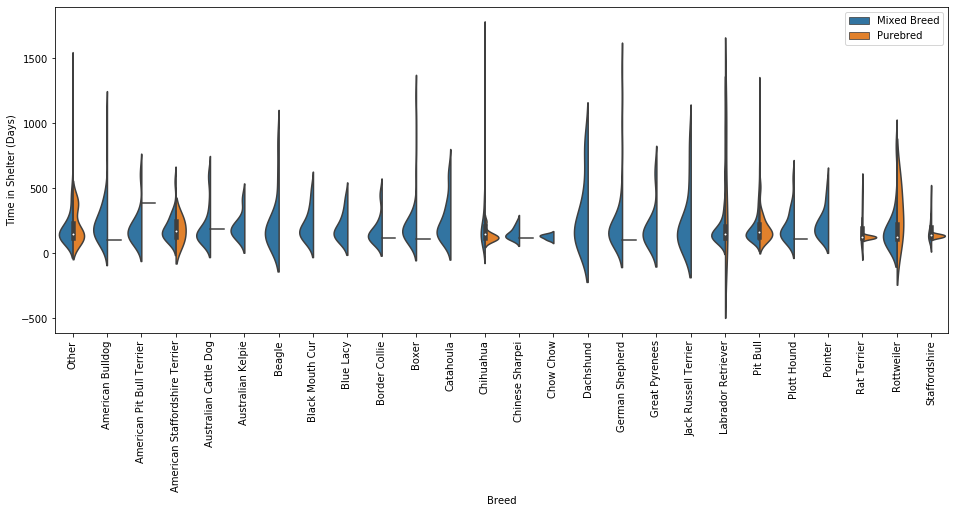

In [158]:
plt.figure(figsize=(16, 6))
sns.violinplot(x='breed_category', y='time_in_shelter_days', hue='mixed_breed', 
                    data=breed_outliers, split=True)
plt.xlabel('Breed')
plt.ylabel('Time in Shelter (Days)')
plt.legend()
plt.xticks(rotation=90)

Note that purebreds almost never appear in this outlier group: only 65 of these datapoints are purebreds.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

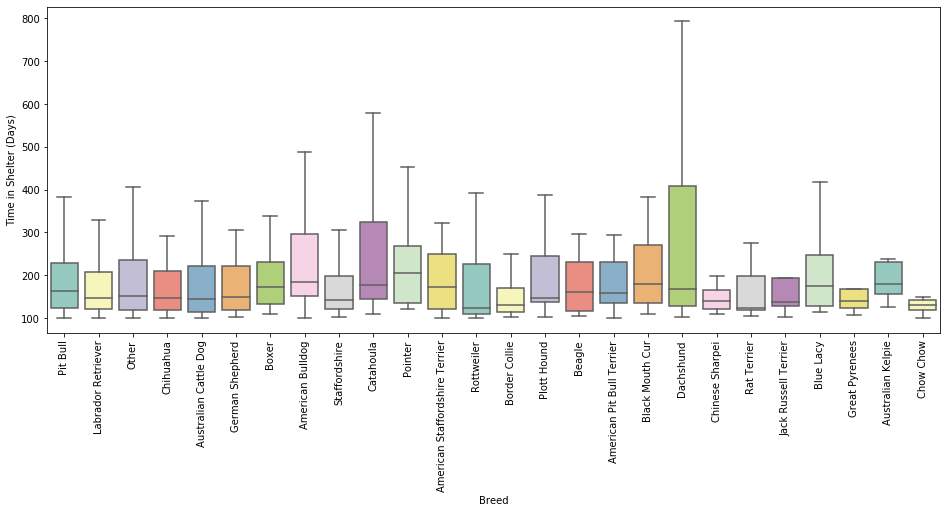

In [216]:
sortgroup_outliers = breed_outliers['breed_category'].value_counts().to_dict()
plt.figure(figsize=(16, 6))
sns.boxplot(x='breed_category', y='time_in_shelter_days', 
                    data=breed_outliers, palette='Set3', showfliers=False, order=sortgroup_outliers)
plt.xlabel('Breed')
plt.ylabel('Time in Shelter (Days)')
plt.xticks(rotation=90)

## Adoption times by breed groups for outliers

In [173]:
breed_groups_outliers = pd.merge(left=breed_outliers, right=dog_groups, left_on='breed', right_on='Breed')
breed_groups_outliers = breed_groups_outliers[breed_groups_outliers['American Kennel Club[4]'].isin(AKCgroups)]

In [174]:
sortbreedgroup_outliers = breed_groups_outliers['American Kennel Club[4]'].value_counts().to_dict()
sortbreedgroup_outliers

{'Sporting Group': 207,
 'Toy Group': 112,
 'Working Group': 93,
 'Herding Group': 92,
 'Hound Group': 57,
 'Terrier Group': 47,
 'Non-Sporting Group': 22,
 'Miscellaneous': 9}

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

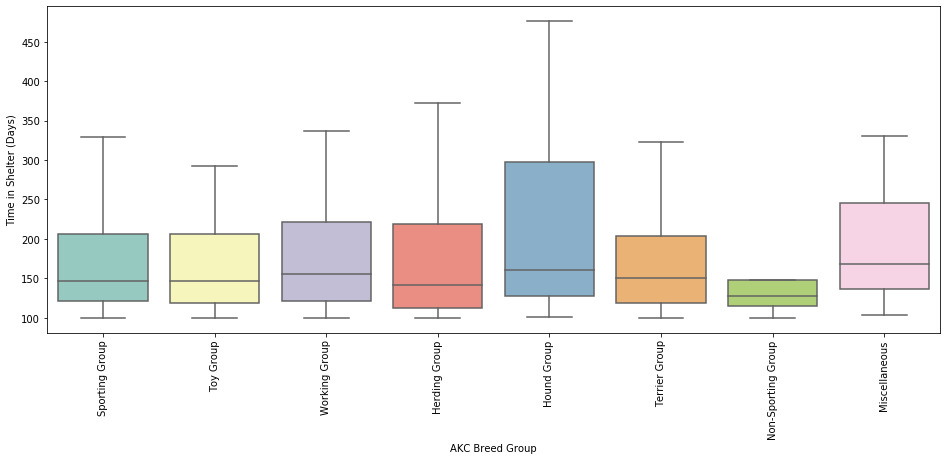

In [178]:
plt.figure(figsize=(16, 6))
sns.boxplot(x='American Kennel Club[4]', y='time_in_shelter_days', 
                    data=breed_groups_outliers, palette='Set3', showfliers=False, order=sortbreedgroup_outliers)
plt.xlabel('AKC Breed Group')
plt.ylabel('Time in Shelter (Days)')
plt.xticks(rotation=90)

## Mixed breed v. purebred adoption times for outliers

(array([0, 1]), <a list of 2 Text xticklabel objects>)

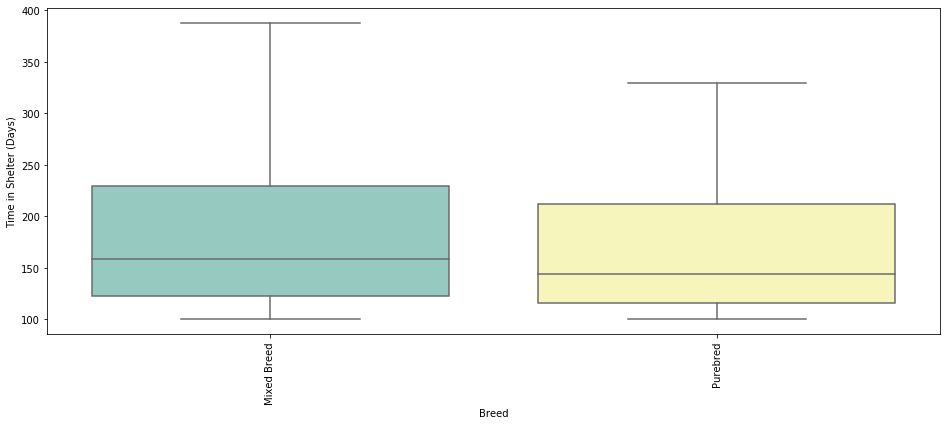

In [180]:
plt.figure(figsize=(16, 6))
sns.boxplot(x='mixed_breed', y='time_in_shelter_days', 
                    data=breed_outliers, palette='Set3', showfliers=False)
plt.xlabel('Breed')
plt.ylabel('Time in Shelter (Days)')
plt.xticks(rotation=90)

## Adoption times for outliers by age group

In [221]:
dog_outliers['age_group'] = dog_outliers['age_upon_outcome_age_group'].str[1:-1]
dog_outliers['age_group'] = dog_outliers['age_group'].str.replace(', ','-')
sortagegroup_outliers = dog_outliers['age_group'].value_counts().to_dict()
sortagegroup_outliers

{'-0.025-2.5': 588,
 '2.5-5.0': 355,
 '7.5-10.0': 129,
 '5.0-7.5': 106,
 '10.0-12.5': 42,
 '12.5-15.0': 16,
 '15.0-17.5': 1}

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

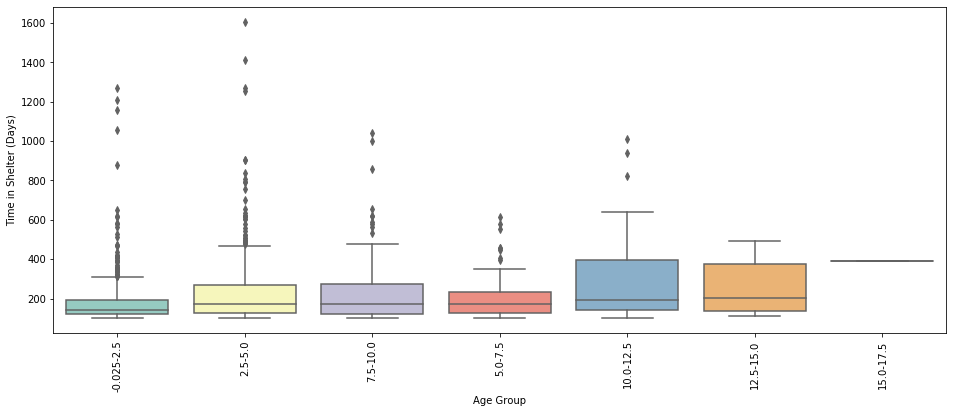

In [226]:
plt.figure(figsize=(16, 6))
sns.boxplot(x='age_group', y='time_in_shelter_days', 
                    data=dog_outliers, palette='Set3', order=sortagegroup_outliers)
plt.xlabel('Age Group')
plt.ylabel('Time in Shelter (Days)')
plt.xticks(rotation=90)

## Does coat color affect adoption times in outliers?

In [229]:
dog_outliers['color'].value_counts().head()

Black/White            182
Brown/White             92
Blue/White              81
Tan/White               74
Brown Brindle/White     69
Name: color, dtype: int64

In [232]:
dog_outliers['coat_color_list'] = dog_outliers['color'].str.split('/')
dog_outliers.loc[dog_outliers.breed_list.str.len()>1, 'multicolor'] = 'Multicolor'
dog_outliers.loc[dog_outliers['color'].str.contains('Tricolor'), 'multicolor'] = 'Multicolor'
dog_outliers['multicolor'] = dog_outliers['multicolor'].fillna('Single Color')
coat_colors_outliers = pd.get_dummies(dog_outliers['coat_color_list'].apply(pd.Series).stack()).sum(level=0)

In [235]:
coat_colors_combined_outliers = pd.concat([dog_outliers, coat_colors_outliers], axis=1)

In [240]:
coat1_outliers = coat_colors_combined_outliers[['color', 'coat_color_list', 'multicolor', 'time_in_shelter_days']]
coat2_outliers = coat_colors_combined_outliers.loc[:, 'Apricot':]
coat_melt_outliers = pd.concat([coat1_outliers, coat2_outliers], axis=1)
dog_coats_outliers = pd.melt(coat_melt_outliers, id_vars=['color', 'coat_color_list', 'multicolor','time_in_shelter_days'], 
                       var_name='coat_color', value_name='has_color')
dog_coats_outliers.loc[dog_coats_outliers['has_color']==1, 'colored'] = dog_coats_outliers['coat_color']

In [243]:
common_colors_outliers = dog_coats_outliers.groupby('colored').count()
common_colors_outliers = common_colors_outliers.sort_values('has_color', ascending=False)
other_colors_outliers = common_colors_outliers.loc[common_colors_outliers['has_color']<60,:]
other_colors_list_outliers = other_colors_outliers.index.tolist()
other_colors_list_outliers

['Tricolor',
 'Chocolate',
 'Fawn',
 'Yellow',
 'Black Brindle',
 'Blue Merle',
 'Sable',
 'Gray',
 'Brown Merle',
 'Buff',
 'Cream',
 'Yellow Brindle',
 'Red Tick',
 'Blue Tiger',
 'Red Merle',
 'Gold',
 'Blue Cream',
 'Black Smoke',
 'Apricot']

In [245]:
dog_coats_outliers.loc[dog_coats_outliers['colored'].isin(other_colors_list_outliers), 'color_category'] = 'Other'
dog_coats_outliers.loc[~dog_coats_outliers['colored'].isin(other_colors_list_outliers), 'color_category'] = dog_coats_outliers['colored']

In [247]:
sort_color_outliers = dog_coats_outliers['color_category'].value_counts().to_dict()

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

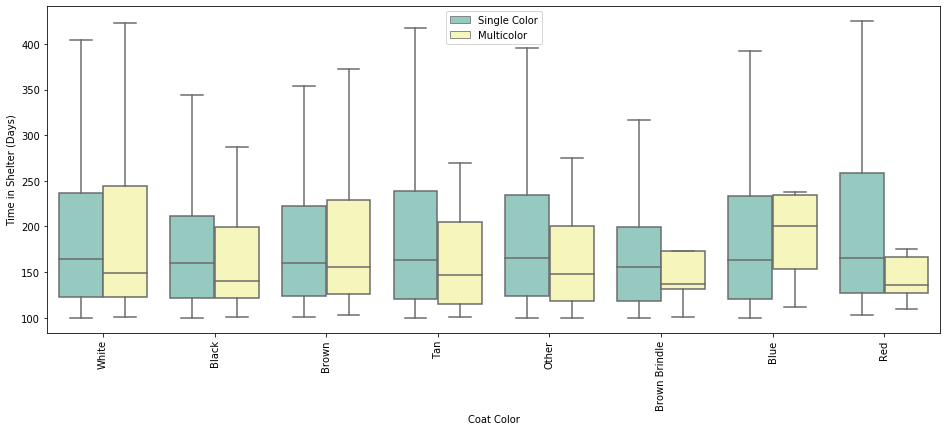

In [248]:
plt.figure(figsize=(16, 6))
sns.boxplot(x='color_category', y='time_in_shelter_days', hue='multicolor', 
                    data=dog_coats_outliers, palette='Set3', showfliers=False, order=sort_color_outliers)
plt.xlabel('Coat Color')
plt.ylabel('Time in Shelter (Days)')
plt.legend()
plt.xticks(rotation=90)

In [214]:
import warnings; warnings.simplefilter('ignore')